In [1]:
from qiskit import *
# Version
print(qiskit.__qiskit_version__)
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


In [2]:
# API Token
from dotenv import load_dotenv
import os

load_dotenv()

API_TOKEN = os.getenv("IBM_API_TOKEN")

from qiskit import IBMQ
IBMQ.save_account(API_TOKEN, overwrite=True)

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# 2 qubit quantum register
qr = QuantumRegister(2)
# 2 bit register
cr = ClassicalRegister(2)

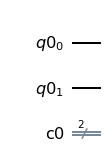

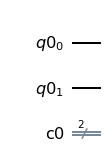

In [4]:
# View circut
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

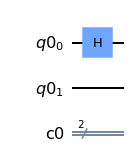

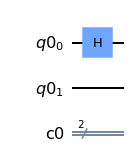

In [5]:
# Hadamard gate for entanglement
circuit.h(qr[0])
circuit.draw(output='mpl')

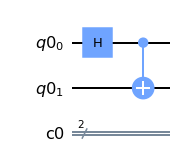

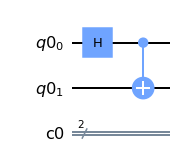

In [6]:
# Controlled X (logical if)
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

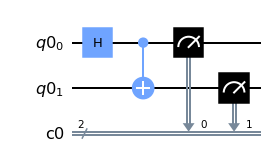

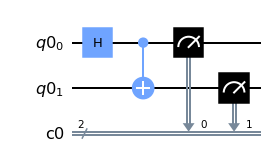

In [7]:
# Measure qubits and store in classical bits
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [8]:
# Use simulator first
simulator = Aer.get_backend('qasm_simulator')

In [9]:
# Generate results
result = execute(experiments=circuit, backend=simulator).result()

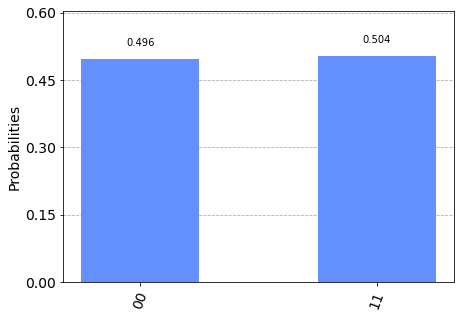

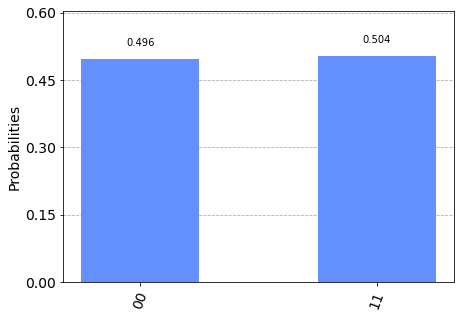

In [10]:
# Plot results
plot_histogram(result.get_counts(circuit))

In [11]:
# Initiate quantum computer
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila')

In [12]:
# Execute circut on quantum computer
job = execute(experiments=circuit, backend=qcomp)

In [13]:
# Monitor when job will be executed
# Quantum computers are public and there is a queue, we need to monitor when our job is executed
job_monitor(job)

Job Status: job has successfully run


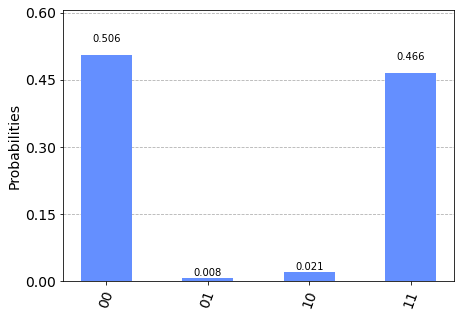

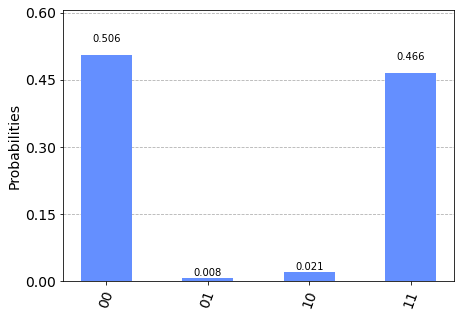

In [14]:
# Plot result
qresult = job.result()
plot_histogram(qresult.get_counts(circuit))